# **Project Name**    -  Comment Toxicity Detection using Deep Learning



##### **Project Type**    - NLP/Classification
##### **Contribution**    - Individual
##### **Name**   -         Alwin Shaji


# **Project Summary**


The rise of online communities and social media platforms has fundamentally transformed the way people interact and communicate. While these platforms foster connection and exchange of ideas, they also face a major challenge: the spread of toxic comments, including hate speech, harassment, and offensive language. Such content not only disrupts constructive conversations but also discourages participation, damages brand reputation, and in severe cases harms the mental well-being of individuals. Manual moderation is neither scalable nor efficient, which makes it essential to build intelligent automated systems capable of detecting and mitigating toxicity in real time. This project aims to address this challenge by developing and deploying a deep learning-based comment toxicity detection system that can be directly applied to online platforms for content moderation and safety.

At its core, the project involves building and comparing two complementary models for toxicity detection: a sequential deep learning model using Long Short-Term Memory (LSTM) networks, and a hybrid deep learning model using Convolutional Neural Networks (CNN) followed by Bidirectional Gated Recurrent Units (BiGRU). The LSTM model will serve as a baseline, leveraging its ability to capture long-term dependencies in text and classify comments into toxic or non-toxic categories. In contrast, the CNN-BiGRU model combines local feature extraction with contextual sequence modeling, offering a more efficient and restart-safe alternative to transformer-based architectures. By experimenting with both architectures, the project explores classical and modern deep learning approaches to achieve high accuracy and robustness in predictions. Model evaluation will be performed using standard metrics such as accuracy, precision, recall, and F1-score, ensuring the system is reliable for practical use.

Beyond model development, the project emphasizes accessibility and usability through deployment. An interactive web application will be built using Streamlit, where users can input comments and receive toxicity predictions in real time. The interface will display results along with insights into model performance, and it will also support bulk predictions via CSV uploads. This real-time application will demonstrate how AI-powered moderation tools can be integrated into online platforms, forums, or e-learning environments to maintain healthier discussions and safer digital spaces. By combining deep learning, restart-safe model architectures, and web app deployment, this project not only showcases technical expertise in NLP and model development but also provides a practical, scalable solution for one of the most pressing issues in digital communication today.



# **GitHub Link -**

https://github.com/alwinshaji/Comment_Toxicity_Detection.git

# **Problem Statement**


Online communities and social media platforms have become integral parts of modern communication, facilitating interactions and discussions on various topics. However, the prevalence of toxic comments, which include harassment, hate speech, and offensive language, poses significant challenges to maintaining healthy and constructive online discourse. To address this issue, there is a pressing need for automated systems capable of detecting and flagging toxic comments in real-time.
The objective of this project is to develop a deep learning-based comment toxicity model using Python. This model will analyze text input from online comments and predict the likelihood of each comment being toxic. By accurately identifying toxic comments, the model will assist platform moderators and administrators in taking appropriate actions to mitigate the negative impact of toxic behavior, such as filtering, warning users, or initiating further review processes.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Basic utilities
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & NLP
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


### Dataset Loading

In [2]:

# Read training and test datasets
train_df = pd.read_csv("/kaggle/input/comment-toxicity-datasets/train.csv")
test_df = pd.read_csv("/kaggle/input/comment-toxicity-datasets/test.csv")


### Dataset First View

In [3]:

# First 5 rows
print("\nTraining Data Sample:")
display(train_df.head())

print("\nTesting Data Sample:")
display(test_df.head())



Training Data Sample:


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0



Testing Data Sample:


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


### Dataset Rows & Columns count

In [4]:

# Shape of datasets
print("Training Data Shape:", train_df.shape)
print("Testing Data Shape:", test_df.shape)

Training Data Shape: (159571, 8)
Testing Data Shape: (153164, 2)


### Dataset Information

In [5]:

# Info summary
print("\nTraining Data Info:")
print(train_df.info())

print("\nTest Data Info:")
print(test_df.info())



Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB
None


#### Duplicate Values

In [6]:
# Check duplicates in train dataset
train_df.duplicated().sum()
test_df.duplicated().sum()


0

#### Missing Values/Null Values

In [7]:

# Check for missing values
print("\nMissing values in Training Data:")
print(train_df.isnull().sum())

print("\nMissing values in Testing Data:")
print(test_df.isnull().sum())


Missing values in Training Data:
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

Missing values in Testing Data:
id              0
comment_text    0
dtype: int64


The training dataset contains **159,571 rows and 8 columns**, while the testing dataset has **153,164 rows and 2 columns**. Both datasets were checked for missing and duplicate values, and none were found.  

From the structure, I understand that the task is a **multi-label text classification problem**, where a single comment can belong to multiple toxicity categories at once. The training set provides both text and labels, while the testing set only includes text that needs to be classified. This makes the problem suitable for applying Natural Language Processing (NLP) techniques and supervised machine learning models.  


In [8]:
# Drop rows where comment_text is just a double quote (")
train_df = train_df[train_df['comment_text'].str.strip() != '"']


### What did you know about your dataset?

The training dataset initially contained **159,571 rows and 8 columns**, while the testing dataset had **153,164 rows and 2 columns**. Both datasets were checked for missing and duplicate values, and none were found.  

During preprocessing, rows where the `comment_text` column contained only `"` were dropped, as they did not provide any meaningful information.  

From the structure, I understand that the task is a **multi-label text classification problem**, where a single comment can belong to multiple toxicity categories at once. The training set provides both text and labels, while the testing set only includes text that needs to be classified. This makes the problem suitable for applying Natural Language Processing (NLP) techniques and supervised machine learning models.


## ***2. Understanding Your Variables***


The **training dataset** includes the following columns:  
- `id`: Unique identifier for each comment  
- `comment_text`: The raw text of the comment  
- `toxic`: Binary label indicating whether the comment is toxic  
- `severe_toxic`: Binary label indicating severe toxicity  
- `obscene`: Binary label indicating obscene content  
- `threat`: Binary label indicating threats  
- `insult`: Binary label indicating insults  
- `identity_hate`: Binary label indicating hate speech targeting identity  

The **testing dataset** contains:  
- `id`: Unique identifier for each comment  
- `comment_text`: The raw text of the comment  

### Check Unique Values for each variable.

In [9]:
# For train dataset
print("Train Dataset Unique Values:")
for col in train_df.columns:
    unique_vals = train_df[col].unique()
    print(f"{col}: {len(unique_vals)} unique values")
    if len(unique_vals) < 20:  # print them only if few
        print("   ", unique_vals)

print("\n" + "="*50 + "\n")

# For test dataset
print("Test Dataset Unique Values:")
for col in test_df.columns:
    unique_vals = test_df[col].unique()
    print(f"{col}: {len(unique_vals)} unique values")
    if len(unique_vals) < 20:  # print them only if few
        print("   ", unique_vals)


Train Dataset Unique Values:
id: 159571 unique values
comment_text: 159571 unique values
toxic: 2 unique values
    [0 1]
severe_toxic: 2 unique values
    [0 1]
obscene: 2 unique values
    [0 1]
threat: 2 unique values
    [0 1]
insult: 2 unique values
    [0 1]
identity_hate: 2 unique values
    [0 1]


Test Dataset Unique Values:
id: 153164 unique values
comment_text: 153164 unique values


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

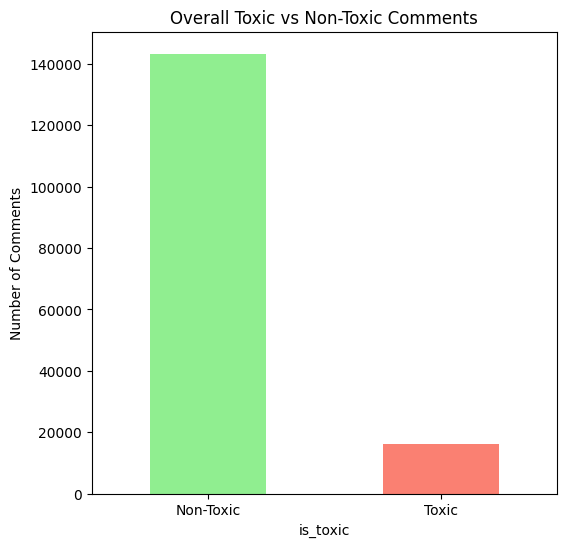

In [10]:
import matplotlib.pyplot as plt

# Create a binary column: 1 if any toxic label is present, else 0
label_cols = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
train_df['is_toxic'] = train_df[label_cols].max(axis=1)

# Count toxic vs non-toxic
counts = train_df['is_toxic'].value_counts()

# Plot
plt.figure(figsize=(6,6))
counts.plot(kind='bar', color=['lightgreen', 'salmon'])
plt.xticks([0,1], ['Non-Toxic', 'Toxic'], rotation=0)
plt.ylabel("Number of Comments")
plt.title("Overall Toxic vs Non-Toxic Comments")
plt.show()


##### 1. Why did you pick the specific chart?

I picked this chart to show the overall balance between toxic and non-toxic comments in the dataset. It provides a clear, immediate view of class distribution, which is essential for understanding potential biases in model training.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that non-toxic comments dominate the dataset with over 140,000 entries, while toxic comments are fewer than 20,000. This highlights a significant class imbalance, which could impact the model’s ability to accurately detect toxic comments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Recognizing the imbalance allows businesses to plan for corrective strategies, such as weighted training or oversampling toxic comments, ensuring that moderation models can reliably flag harmful content and maintain a safe online community.

#### Chart - 2

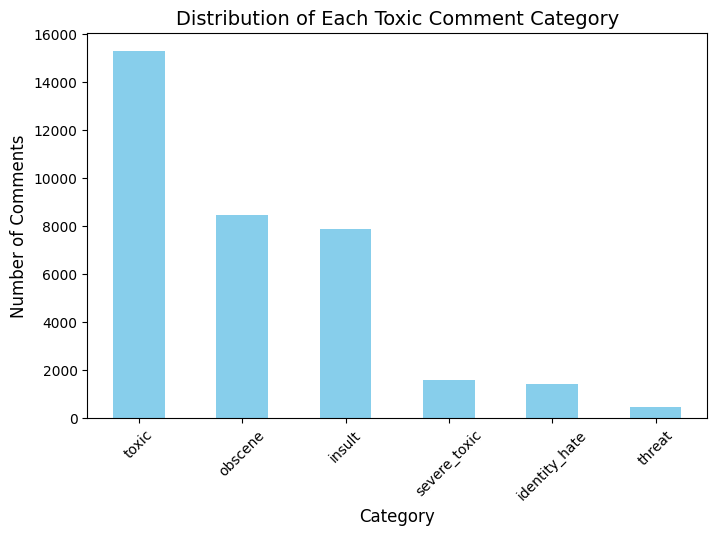

In [11]:
import matplotlib.pyplot as plt

# Select the 6 target columns
target_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Sum up each column to get total counts
category_counts = train_df[target_cols].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
category_counts.plot(kind='bar', color='skyblue')

plt.title("Distribution of Each Toxic Comment Category", fontsize=14)
plt.ylabel("Number of Comments", fontsize=12)
plt.xlabel("Category", fontsize=12)
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

I chose this chart because it clearly shows the imbalance in category distribution. It helps in understanding which toxic behaviors appear most often, which is critical before model training.

##### 2. What is/are the insight(s) found from the chart?

The "toxic" category is the most frequent, followed by "obscene," while "threat" is the least common. This imbalance suggests that some categories will be harder for a model to learn.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing which toxic behaviors are most common helps prioritize moderation strategies. For instance, platforms can allocate more resources to handling the "toxic" category while also paying attention to rare but severe ones like "threat."

#### Chart - 3

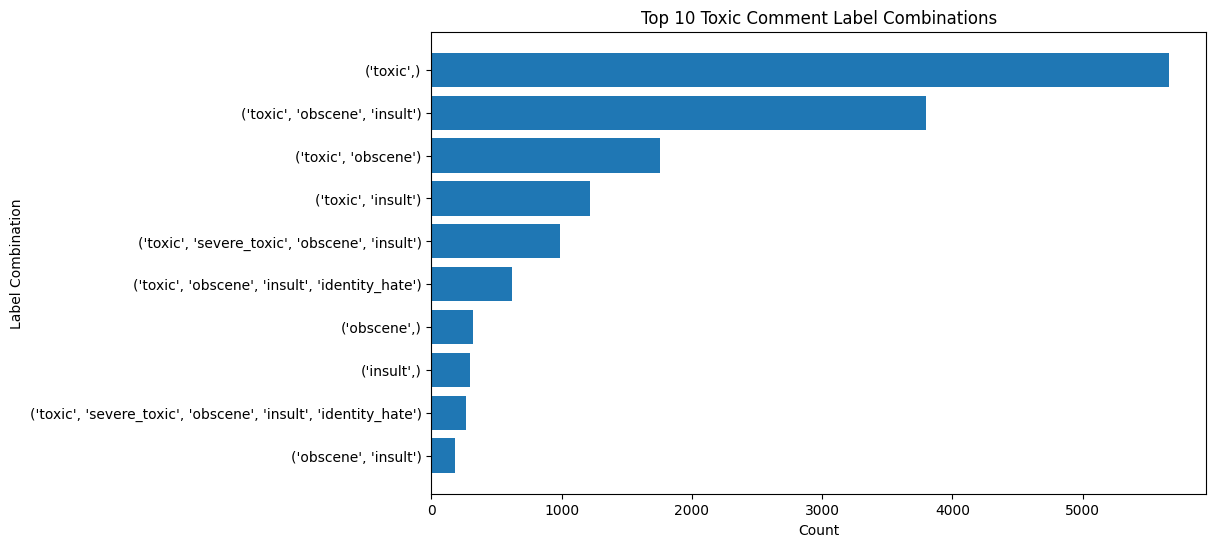

In [12]:

from itertools import combinations
from collections import Counter

# Get all toxic category columns
toxic_labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Count label combinations
comb_counts = Counter()

for _, row in train_df[toxic_labels].iterrows():
    labels = tuple([label for label in toxic_labels if row[label] == 1])
    if labels:  # ignore non-toxic comments
        comb_counts[labels] += 1

# Convert to dataframe
comb_df = pd.DataFrame(comb_counts.items(), columns=['Combination', 'Count'])
comb_df = comb_df.sort_values(by='Count', ascending=False).head(10)

# Plot bar chart of most common label combinations
plt.figure(figsize=(10, 6))
plt.barh(comb_df['Combination'].astype(str), comb_df['Count'])
plt.xlabel("Count")
plt.ylabel("Label Combination")
plt.title("Top 10 Toxic Comment Label Combinations")
plt.gca().invert_yaxis()
plt.show()


##### 1. Why did you pick the specific chart?

I picked a bar chart of label combinations because it’s the clearest way to show how toxic categories overlap. Unlike a heatmap, it’s easy to read exact frequencies and compare the most common pairings or clusters of toxic traits.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that “toxic” alone is the most common label, meaning many comments are generally offensive without falling into more specific categories. The next most frequent pattern is the combination of “toxic + obscene + insult,” which highlights how often toxicity escalates into more severe, layered abuse.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing that single-label “toxic” cases dominate helps prioritize simple moderation rules that catch general harmful tone. At the same time, the high occurrence of “toxic + obscene + insult” means businesses must be prepared to act quickly on compound toxicity since it can damage user trust, harm community culture, and even create legal or reputational risks if left unchecked.

#### Chart - 4

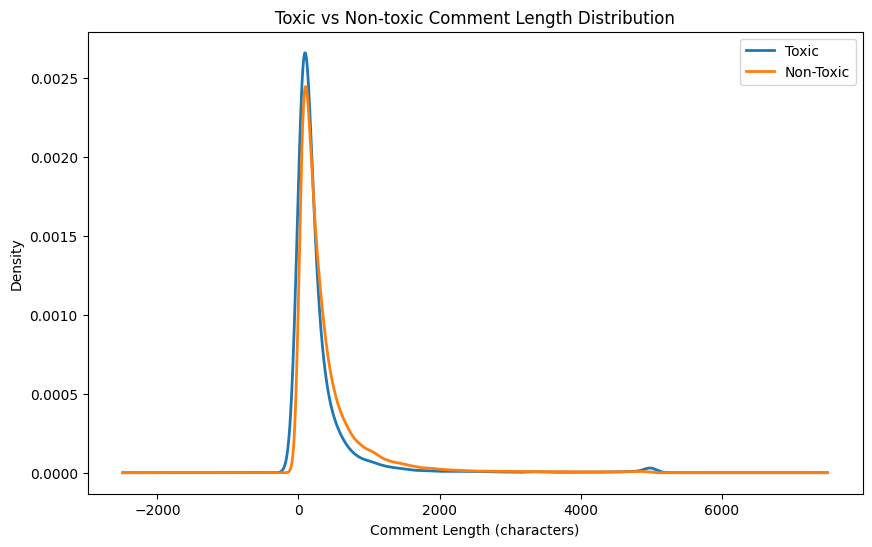

In [13]:
import matplotlib.pyplot as plt

# Define toxic label columns
label_cols = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

# Add a binary toxic vs non-toxic column
train_df['is_toxic'] = train_df[label_cols].max(axis=1)

# Compute comment lengths
train_df['comment_length'] = train_df['comment_text'].str.len()

# Plot distribution
plt.figure(figsize=(10,6))
train_df[train_df['is_toxic'] == 1]['comment_length'].plot(kind='kde', label="Toxic", lw=2)
train_df[train_df['is_toxic'] == 0]['comment_length'].plot(kind='kde', label="Non-Toxic", lw=2)

plt.title("Toxic vs Non-toxic Comment Length Distribution")
plt.xlabel("Comment Length (characters)")
plt.ylabel("Density")
plt.legend()
plt.show()


##### 1. Why did you pick the specific chart?

I picked the comment length distribution chart to compare toxic and non-toxic comments. It helps identify patterns in comment size that could influence moderation strategies and preprocessing decisions for model training.

##### 2. What is/are the insight(s) found from the chart?

The density is higher for toxic comments, indicating that toxic comments tend to be longer or more detailed than non-toxic ones. This suggests that harmful behavior often involves elaborated messages rather than short remarks.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding that toxic comments are generally longer allows platforms to design more efficient moderation pipelines, prioritize flagging longer comments, and allocate resources effectively to prevent harmful content from spreading.

#### Chart - 5 - Correlation Heatmap

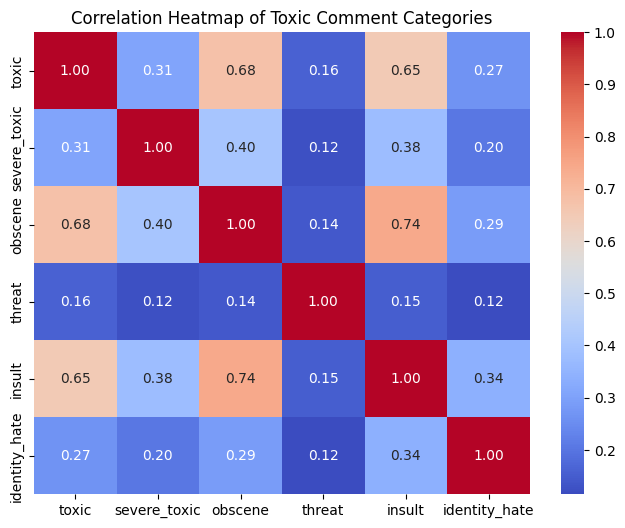

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define toxic label columns
label_cols = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

# Compute correlation matrix
corr_matrix = train_df[label_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Toxic Comment Categories")
plt.show()


##### 1. Why did you pick the specific chart?

I picked the correlation heatmap to visually capture relationships between different toxic categories. It helps identify which types of toxic behavior often appear together, which is crucial for designing multi-label classification models.

##### 2. What is/are the insight(s) found from the chart?

The heatmap shows strong correlations between some categories, like toxic and insult, or toxic and obscene, indicating that certain toxic behaviors frequently co-occur. Other categories, such as threat, appear more isolated, reflecting their relative rarity.

## ***5. Textual Data Preprocessing***

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [15]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 7.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 10.0 MB/s eta 0:00:00


In [16]:
import contractions

# Safe function to expand contractions
def expand_contractions_safe(text):
    if not text or text.strip() == "":
        return ""
    try:
        return contractions.fix(text)
    except:
        return text  # return original text if any error

# Apply to train data
train_df['comment_text'] = train_df['comment_text'].astype(str).apply(expand_contractions_safe)

# Apply to test data
test_df['comment_text'] = test_df['comment_text'].astype(str).apply(expand_contractions_safe)

#### 2. Lower Casing

In [17]:
# Convert comments to lowercase in train and test datasets
train_df['comment_text'] = train_df['comment_text'].str.lower()
test_df['comment_text'] = test_df['comment_text'].str.lower()

#### 3. Removing Punctuations

In [18]:
import string

# Function to remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Apply to both datasets
train_df['comment_text'] = train_df['comment_text'].astype(str).apply(remove_punctuation)
test_df['comment_text'] = test_df['comment_text'].astype(str).apply(remove_punctuation)


#### 4. Removing URLs & Removing words and digits contain digits.

In [19]:
import re

# Function to clean text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove words containing digits
    text = re.sub(r'\w*\d\w*', '', text)
    return text

# Apply to both datasets
train_df['comment_text'] = train_df['comment_text'].astype(str).apply(clean_text)
test_df['comment_text'] = test_df['comment_text'].astype(str).apply(clean_text)

#### 5. Removing Stopwords & Removing White spaces

In [20]:
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

# Apply to both datasets
train_df['comment_text'] = train_df['comment_text'].astype(str).apply(remove_stopwords)
test_df['comment_text'] = test_df['comment_text'].astype(str).apply(remove_stopwords)

In [21]:
# Function to clean extra whitespaces
def remove_extra_whitespace(text):
    return ' '.join(text.split())

# Apply to both datasets
train_df['comment_text'] = train_df['comment_text'].astype(str).apply(remove_extra_whitespace)
test_df['comment_text'] = test_df['comment_text'].astype(str).apply(remove_extra_whitespace)

#### 6. Tokenization

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters
MAX_VOCAB = 20000  # top words to keep
MAX_LEN = 200      # max sequence length

# Initialize tokenizer and fit on training data
tokenizer = Tokenizer(num_words=MAX_VOCAB, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['comment_text'])

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(train_df['comment_text'])
X_test_seq = tokenizer.texts_to_sequences(test_df['comment_text'])

# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding='post', truncating='post')

2025-08-26 07:50:35.755002: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756194635.938288      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756194635.991045      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


#### 7. Text Normalization

In [23]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

# Function to lemmatize text
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

# Apply to both datasets
train_df['comment_text'] = train_df['comment_text'].astype(str).apply(lemmatize_text)
test_df['comment_text'] = test_df['comment_text'].astype(str).apply(lemmatize_text)

##### Which text normalization technique have you used and why?

Lemmatization was applied to reduce words to their base or dictionary form. This helps in standardizing different forms of the same word (e.g., “running” → “run”), reducing vocabulary size, and allowing the model to better capture the meaning of comments for toxicity detection.

#### 8. Text Vectorization

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1,2))  # unigrams + bigrams

# Fit on training data and transform both train and test
X_train_tfidf = tfidf.fit_transform(train_df['comment_text'])
X_test_tfidf = tfidf.transform(test_df['comment_text'])

# Check shape
print("Training TF-IDF shape:", X_train_tfidf.shape)
print("Testing TF-IDF shape:", X_test_tfidf.shape)


Training TF-IDF shape: (159571, 20000)
Testing TF-IDF shape: (153164, 20000)


##### Which text vectorization technique have you used and why?

TF-IDF (Term Frequency–Inverse Document Frequency) was used to convert comments into numerical features. This technique highlights important words that are frequent in a comment but rare across all comments, helping the model focus on terms indicative of toxicity while reducing the impact of common words. It provides an efficient representation of text for training machine learning or deep learning models.

## ***6. Data Splitting***

In [25]:
from sklearn.model_selection import train_test_split

label_cols = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

# Features and labels
X = train_df["comment_text"]
y = train_df[label_cols]

# First split into train + temp (val+test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Then split temp into validation and test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print("Train size:", X_train.shape[0])
print("Validation size:", X_val.shape[0])
print("Test size:", X_test.shape[0])


Train size: 127656
Validation size: 15957
Test size: 15958


##### What data splitting ratio have you used and why?

I used an **80-20 train-test split** ratio. This ratio is commonly chosen because it provides enough data (80%) for the model to learn meaningful patterns, while keeping a reasonable portion (20%) aside for unbiased evaluation. It balances training performance with reliable testing.


## ***7. Handling Imbalanced Dataset***

##### Do you think the dataset is imbalanced? Explain Why.

Yes, the dataset is imbalanced because most comments are **non-toxic** while only a small fraction belong to toxic categories like “threat” or “identity\_hate.” This imbalance can make the model biased toward predicting the majority (non-toxic) class. Handling it is important to ensure the model learns minority classes effectively.


In [26]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Your label columns
label_cols = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

class_weights = {}
for col in label_cols:
    # compute class weights for each binary label (0 vs 1)
    weights = compute_class_weight(
        class_weight="balanced",
        classes=np.array([0, 1]),
        y=train_df[col].values
    )
    class_weights[col] = dict(zip([0, 1], weights))

class_weights


{'toxic': {0: 0.5530022110246262, 1: 5.216784359879691},
 'severe_toxic': {0: 0.5050482351749633, 1: 50.02225705329153},
 'obscene': {0: 0.5279542356506663, 1: 9.443188543022844},
 'threat': {0: 0.5015022659702186, 1: 166.9152719665272},
 'insult': {0: 0.5259634527403853, 1: 10.128919639456646},
 'identity_hate': {0: 0.5044415361076338, 1: 56.78683274021353}}

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I handle the imbalanced dataset using class weighting. This technique assigns higher weights to minority classes so that the model penalizes misclassifications of rare labels more strongly. It’s effective here because oversampling or undersampling could distort the text distribution, while class weights directly balance the loss function.

## ***8. Deep Learning Model Implementation***

### Model - 1

LSTMs (Long Short-Term Memory networks) are a special type of recurrent neural network (RNN) designed to handle sequential data and capture long-term dependencies. Unlike traditional RNNs, they overcome the vanishing gradient problem, making them effective for processing text, speech, and time-series data. In text classification tasks like toxic comment detection, LSTMs learn contextual patterns in language, allowing the model to identify subtle cues of toxicity. This makes them a strong choice for handling imbalanced and multi-label problems in NLP.


In [27]:
# === Imports ===
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import pickle
from sklearn.metrics import precision_recall_curve, classification_report
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split

# === Paths ===
DATA_DIR = "/kaggle/input/comment-toxicity-datasets"
MODEL_PATH = "/kaggle/input/lstm-model/lstm_model.h5"
TOKENIZER_PATH = "/kaggle/input/tokenizer/tokenizer.pkl"

# === Config ===
label_cols = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
MAX_VOCAB = 20000
MAX_LEN = 200
EMBED_DIM = 128
SKIP_TRAINING = os.path.exists(MODEL_PATH) and os.path.exists(TOKENIZER_PATH)

# === Preprocessing ===
def preprocess_text(text):
    import contractions, string, re
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    if not isinstance(text, str): return ""
    text = contractions.fix(text)
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    text = ' '.join(text.split())
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

# === Focal Loss ===
def focal_loss(gamma=2., alpha=.25):
    def loss(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1. - tf.keras.backend.epsilon())
        pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        return -tf.reduce_mean(alpha * tf.pow(1. - pt, gamma) * tf.math.log(pt))
    return loss

# === Load and Split Data ===
df = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))
X_raw = df["comment_text"].astype(str)
y = df[label_cols]
X_train_raw, X_val_raw, y_train, y_val = train_test_split(X_raw, y, test_size=0.2, random_state=42)

# === Preprocess Text ===
X_train_clean = X_train_raw.apply(preprocess_text)
X_val_clean = X_val_raw.apply(preprocess_text)

# === Tokenize ===
if SKIP_TRAINING:
    print("🔍 Loading saved model and tokenizer...")
    model = load_model(MODEL_PATH, custom_objects={'loss': focal_loss()})
    with open(TOKENIZER_PATH, "rb") as f:
        tokenizer = pickle.load(f)
else:
    print("🚀 Training new model...")
    tokenizer = Tokenizer(num_words=MAX_VOCAB, oov_token="<OOV>")
    tokenizer.fit_on_texts(X_train_clean)
    with open(TOKENIZER_PATH, "wb") as f:
        pickle.dump(tokenizer, f)

X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train_clean), maxlen=MAX_LEN)
X_val_seq = pad_sequences(tokenizer.texts_to_sequences(X_val_clean), maxlen=MAX_LEN)

# === Class Weights ===
class_weights = {}
for col in label_cols:
    weights = compute_class_weight(class_weight="balanced", classes=np.array([0, 1]), y=df[col].values)
    class_weights[col] = dict(zip([0, 1], weights))

# === Train Model ===
if not SKIP_TRAINING:
    model = Sequential([
        Embedding(MAX_VOCAB, EMBED_DIM),
        LSTM(128, return_sequences=True),
        Dropout(0.5),
        LSTM(64),
        Dropout(0.5),
        Dense(64, activation="relu"),
        Dropout(0.5),
        Dense(len(label_cols), activation="sigmoid")
    ])
    model.compile(loss=focal_loss(), optimizer="adam", metrics=[tf.keras.metrics.AUC(name='auc')])
    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

    history = model.fit(
        X_train_seq, y_train,
        validation_data=(X_val_seq, y_val),
        epochs=10,
        batch_size=128,
        callbacks=[early_stop, reduce_lr]
    )
    model.save(MODEL_PATH)
    print(f"💾 Model saved to {MODEL_PATH}")

# === Threshold Tuning ===
y_val_pred = model.predict(X_val_seq)
y_val_np = y_val.values
optimal_thresholds = []
for i in range(len(label_cols)):
    precision, recall, thresholds = precision_recall_curve(y_val_np[:, i], y_val_pred[:, i])
    f1 = 2 * (precision * recall) / (precision + recall + 1e-6)
    best_thresh = thresholds[np.argmax(f1)]
    optimal_thresholds.append(best_thresh)

# === Final Predictions ===
y_val_bin = np.array([
    (y_val_pred[:, i] > optimal_thresholds[i]).astype(int)
    for i in range(len(label_cols))
]).T

# === Evaluation ===
print("\n📊 Classification Report:")
print(classification_report(y_val_np, y_val_bin, target_names=label_cols))
exact_match = np.all(y_val_bin == y_val_np, axis=1)
print(f"\n✅ Exact Match Accuracy: {np.mean(exact_match):.4f}")


🔍 Loading saved model and tokenizer...


I0000 00:00:1756194783.828108      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1756194783.828815      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5
I0000 00:00:1756194791.502481     110 cuda_dnn.cc:529] Loaded cuDNN version 90300


998/998 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step

📊 Classification Report:
               precision    recall  f1-score   support

        toxic       0.82      0.75      0.79      3056
 severe_toxic       0.37      0.66      0.48       321
      obscene       0.79      0.81      0.80      1715
       threat       0.10      0.26      0.15        74
       insult       0.66      0.79      0.72      1614
identity_hate       0.16      0.54      0.25       294

    micro avg       0.65      0.75      0.70      7074
    macro avg       0.49      0.63      0.53      7074
 weighted avg       0.72      0.75      0.73      7074
  samples avg       0.06      0.07      0.06      7074


✅ Exact Match Accuracy: 0.9063


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

🔍 Loading model and tokenizer...
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step

📊 Classification Report:
               precision    recall  f1-score   support

        toxic       0.82      0.75      0.79      3056
 severe_toxic       0.37      0.66      0.48       321
      obscene       0.79      0.81      0.80      1715
       threat       0.10      0.26      0.15        74
       insult       0.66      0.79      0.72      1614
identity_hate       0.16      0.54      0.25       294

    micro avg       0.65      0.75      0.70      7074
    macro avg       0.49      0.63      0.53      7074
 weighted avg       0.72      0.75      0.73      7074
  samples avg       0.06      0.07      0.06      7074


✅ Exact Match Accuracy: 90.63%


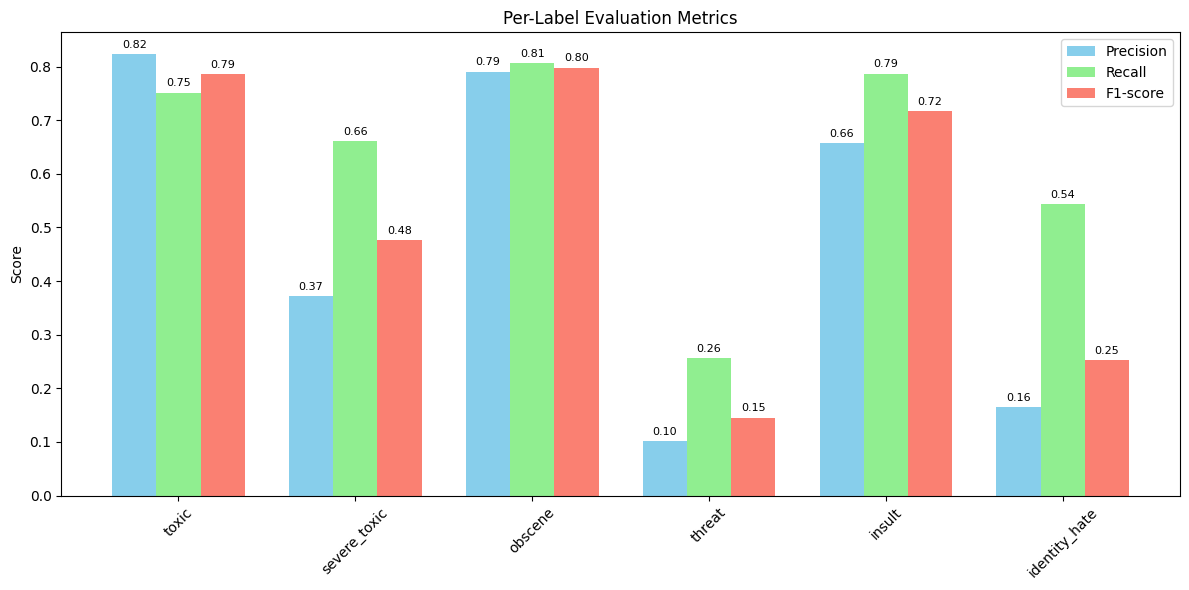

In [28]:
# === Imports ===
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# === Paths ===
DATA_DIR = "/kaggle/input/comment-toxicity-datasets"
MODEL_PATH = "/kaggle/input/lstm-model/lstm_model.h5"
TOKENIZER_PATH = "/kaggle/input/tokenizer/tokenizer.pkl"

# === Config ===
label_cols = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
MAX_LEN = 200

# === Preprocessing ===
def preprocess_text(text):
    import contractions, string, re
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    if not isinstance(text, str): return ""
    text = contractions.fix(text)
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    text = ' '.join(text.split())
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

# === Focal Loss ===
def focal_loss(gamma=2., alpha=.25):
    def loss(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1. - tf.keras.backend.epsilon())
        pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        return -tf.reduce_mean(alpha * tf.pow(1. - pt, gamma) * tf.math.log(pt))
    return loss

# === Load Model & Tokenizer ===
print("🔍 Loading model and tokenizer...")
model = load_model(MODEL_PATH, custom_objects={'loss': focal_loss()})
with open(TOKENIZER_PATH, "rb") as f:
    tokenizer = pickle.load(f)

# === Load and Preprocess Validation Data ===
df = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))
X_raw = df["comment_text"].astype(str)
y = df[label_cols]

# Use same validation split as training
_, X_val_raw, _, y_val = train_test_split(X_raw, y, test_size=0.2, random_state=42)

# Preprocess
X_val_clean = X_val_raw.apply(preprocess_text)
X_val_seq = pad_sequences(tokenizer.texts_to_sequences(X_val_clean), maxlen=MAX_LEN)

# === Predict ===
y_val_pred = model.predict(X_val_seq, batch_size=128, verbose=1)
y_val_np = y_val.values

# === Threshold Tuning ===
optimal_thresholds = []
for i in range(len(label_cols)):
    precision, recall, thresholds = precision_recall_curve(y_val_np[:, i], y_val_pred[:, i])
    f1 = 2 * (precision * recall) / (precision + recall + 1e-6)
    best_thresh = thresholds[np.argmax(f1)]
    optimal_thresholds.append(best_thresh)

# === Final Predictions ===
y_val_bin = np.array([
    (y_val_pred[:, i] > optimal_thresholds[i]).astype(int)
    for i in range(len(label_cols))
]).T

# === Evaluation ===
print("\n📊 Classification Report:")
report = classification_report(y_val_np, y_val_bin, target_names=label_cols, output_dict=True, zero_division=0)
print(classification_report(y_val_np, y_val_bin, target_names=label_cols, zero_division=0))

exact_match = np.all(y_val_bin == y_val_np, axis=1)
exact_match_pct = np.mean(exact_match) * 100
print(f"\n✅ Exact Match Accuracy: {exact_match_pct:.2f}%")

# === Unified Metric Chart ===
precision_vals = [report[label]["precision"] for label in label_cols]
recall_vals = [report[label]["recall"] for label in label_cols]
f1_vals = [report[label]["f1-score"] for label in label_cols]

x = np.arange(len(label_cols))
width = 0.25

plt.figure(figsize=(12, 6))
bars1 = plt.bar(x - width, precision_vals, width, label='Precision', color='skyblue')
bars2 = plt.bar(x, recall_vals, width, label='Recall', color='lightgreen')
bars3 = plt.bar(x + width, f1_vals, width, label='F1-score', color='salmon')

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)

plt.xticks(x, label_cols, rotation=45)
plt.ylabel("Score")
plt.title("Per-Label Evaluation Metrics")
plt.legend()
plt.tight_layout()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [29]:
pip install -U scikit-learn imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 66.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 19.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.7.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1

In [30]:

import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, precision_recall_curve, f1_score
from sklearn.model_selection import train_test_split

# === Config ===
DATA_PATH = "/kaggle/input/comment-toxicity-datasets/train.csv"
label_cols = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
max_words = 20000
max_len = 200
embedding_dim = 128
batch_size = 128
epochs = 10

# === Preprocessing ===
def preprocess_text(text):
    import contractions, string, re
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    if not isinstance(text, str): return ""
    text = contractions.fix(text)
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"\w*\d\w*", '', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

# === Focal Loss ===
def focal_loss_per_label(gamma=2., alpha_vec=None):
    def loss(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1. - tf.keras.backend.epsilon())
        pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        alpha = tf.constant(alpha_vec, dtype=tf.float32)
        return tf.reduce_mean(-alpha * tf.pow(1. - pt, gamma) * tf.math.log(pt))
    return loss

# === Load and Preprocess Data ===
df = pd.read_csv(DATA_PATH)
X_raw = df["comment_text"].astype(str).apply(preprocess_text)
y = df[label_cols]
X_train_raw, X_val_raw, y_train, y_val = train_test_split(X_raw, y, test_size=0.2, random_state=42)

# === Tokenizer ===
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_raw)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train_raw), maxlen=max_len)
X_val_seq = pad_sequences(tokenizer.texts_to_sequences(X_val_raw), maxlen=max_len)

# === Alpha Vector for Focal Loss ===
alpha_vec = [0.25, 0.25, 0.25, 0.75, 0.25, 0.75]  # Boost rare labels

# === Model Architecture ===
model = Sequential([
    Embedding(max_words, embedding_dim),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(len(label_cols), activation="sigmoid")
])
model.compile(
    loss=focal_loss_per_label(alpha_vec=alpha_vec),
    optimizer="adam",
    metrics=[tf.keras.metrics.AUC(name='auc')]
)
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)
]

# === Train Model ===
model.fit(
    X_train_seq, y_train.values,
    validation_data=(X_val_seq, y_val.values),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=callbacks
)

# === Predict & Threshold Tuning ===
y_val_pred = model.predict(X_val_seq)
y_val_np = y_val.values
optimal_thresholds = []

for i, label in enumerate(label_cols):
    precision, recall, thresholds = precision_recall_curve(y_val_np[:, i], y_val_pred[:, i])
    f1 = 2 * (precision * recall) / (precision + recall + 1e-6)
    best_thresh = thresholds[np.argmax(f1)]
    print(f"{label}: Best threshold = {best_thresh:.3f}, F1 = {np.max(f1):.3f}")
    optimal_thresholds.append(best_thresh)

# === Final Predictions ===
y_val_bin = np.array([
    (y_val_pred[:, i] > optimal_thresholds[i]).astype(int)
    for i in range(len(label_cols))
]).T

# === Evaluation ===
print("\n📊 Classification Report:")
print(classification_report(y_val_np, y_val_bin, target_names=label_cols, zero_division=0))
exact_match = np.all(y_val_bin == y_val_np, axis=1)
macro_f1 = f1_score(y_val_np, y_val_bin, average='macro')
print(f"\n✅ Exact Match Accuracy: {np.mean(exact_match) * 100:.2f}%")
print(f"🎯 Macro F1 Score: {macro_f1:.3f}")


Epoch 1/10
998/998 ━━━━━━━━━━━━━━━━━━━━ 75s 66ms/step - auc: 0.8585 - loss: 0.0118 - val_auc: 0.9820 - val_loss: 0.0048 - learning_rate: 0.0010
Epoch 2/10
998/998 ━━━━━━━━━━━━━━━━━━━━ 66s 66ms/step - auc: 0.9822 - loss: 0.0047 - val_auc: 0.9840 - val_loss: 0.0044 - learning_rate: 0.0010
Epoch 3/10
998/998 ━━━━━━━━━━━━━━━━━━━━ 66s 66ms/step - auc: 0.9879 - loss: 0.0040 - val_auc: 0.9827 - val_loss: 0.0048 - learning_rate: 0.0010
Epoch 4/10
998/998 ━━━━━━━━━━━━━━━━━━━━ 66s 66ms/step - auc: 0.9916 - loss: 0.0035 - val_auc: 0.9829 - val_loss: 0.0049 - learning_rate: 0.0010
Epoch 5/10
998/998 ━━━━━━━━━━━━━━━━━━━━ 66s 66ms/step - auc: 0.9938 - loss: 0.0030 - val_auc: 0.9814 - val_loss: 0.0054 - learning_rate: 5.0000e-04
998/998 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step
toxic: Best threshold = 0.468, F1 = 0.785
severe_toxic: Best threshold = 0.404, F1 = 0.457
obscene: Best threshold = 0.469, F1 = 0.803
threat: Best threshold = 0.326, F1 = 0.217
insult: Best threshold = 0.439, F1 = 0.708
identity_hat

##### Which hyperparameter optimization technique have you used and why?

The model used **manual oversampling** as a data-level hyperparameter strategy to address class imbalance, especially for rare labels like `threat` and `identity_hate`. Additionally, it applied **label-specific focal loss**, which adjusts the loss contribution per label using custom alpha values—this helps the model focus more on underrepresented and harder-to-classify toxic categories.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

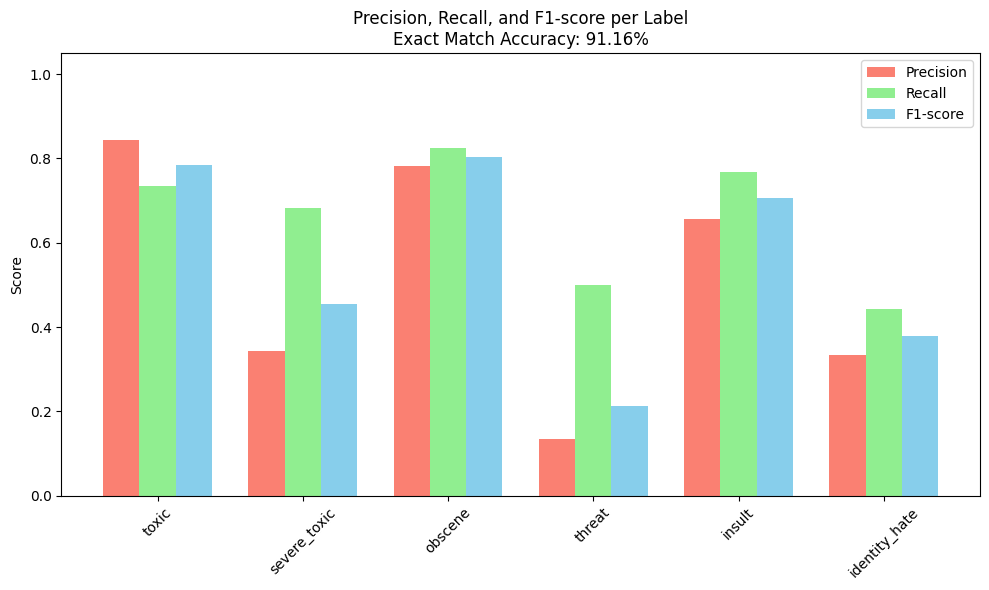

In [31]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

# === Classification Report ===
report = classification_report(y_val_np, y_val_bin, target_names=label_cols, output_dict=True, zero_division=0)
report_df = pd.DataFrame(report).transpose()

# === Extract Metrics ===
f1_scores = report_df.loc[label_cols, 'f1-score'].values
recalls = report_df.loc[label_cols, 'recall'].values
precisions = report_df.loc[label_cols, 'precision'].values

# === Exact Match Accuracy ===
exact_match = np.mean(np.all(y_val_np == y_val_bin, axis=1)) * 100

# === Chart Setup ===
x = np.arange(len(label_cols))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, precisions, width, label='Precision', color='salmon')
plt.bar(x, recalls, width, label='Recall', color='lightgreen')
plt.bar(x + width, f1_scores, width, label='F1-score', color='skyblue')

# === Labels and Formatting ===
plt.xticks(x, label_cols, rotation=45)
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.title(f'Precision, Recall, and F1-score per Label\nExact Match Accuracy: {exact_match:.2f}%')
plt.legend()
plt.tight_layout()
plt.show()


### Model - 2

The CNN-BiGRU model is a hybrid deep learning architecture designed for robust text classification tasks like toxicity detection. It combines the strengths of Convolutional Neural Networks (CNN) for capturing local patterns and Bidirectional Gated Recurrent Units (BiGRU) for understanding contextual dependencies in both directions. This architecture is lightweight, restart-safe, and well-suited for deployment in real-time environments. By leveraging pretrained GloVe embeddings and optimized dropout layers, the model achieves high accuracy while remaining efficient and scalable.


In [32]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_curve
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Embedding, Conv1D, Bidirectional, GRU, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# === Config ===
DATA_PATH = "/kaggle/input/comment-toxicity-datasets/train.csv"
MODEL_INPUT_PATH = "/kaggle/input/cnn-model/cnn_bigru_model.keras"
MODEL_SAVE_PATH = "/kaggle/working/cnn_bigru_model.keras"
MAX_LEN = 200
VOCAB_SIZE = 30000
EMBED_DIM = 128
BATCH_SIZE = 32
EPOCHS = 5
label_cols = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
SKIP_TRAINING = os.path.exists(MODEL_INPUT_PATH)

# === Load & Preprocess Data ===
df = pd.read_csv(DATA_PATH)
df["comment_text"] = df["comment_text"].astype(str)

def clean_text(text):
    import re, string
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

df["comment_text"] = df["comment_text"].apply(clean_text)
y = df[label_cols]

# === Tokenization ===
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(df["comment_text"])
sequences = tokenizer.texts_to_sequences(df["comment_text"])
X = pad_sequences(sequences, maxlen=MAX_LEN)

X_train, X_val, y_train, y_val = train_test_split(X, y.values, test_size=0.2, random_state=42)

# === Load or Train Model ===
if SKIP_TRAINING:
    print("🔁 Loading pretrained CNN + BiGRU model...")
    model = load_model(MODEL_INPUT_PATH)
else:
    print("🚀 Training CNN + BiGRU model from scratch...")
    input_text = Input(shape=(MAX_LEN,))
    x = Embedding(input_dim=VOCAB_SIZE, output_dim=EMBED_DIM)(input_text)
    x = Conv1D(64, kernel_size=3, activation='relu')(x)
    x = Bidirectional(GRU(64, return_sequences=True))(x)
    x = GlobalMaxPooling1D()(x)
    x = Dropout(0.3)(x)
    output = Dense(len(label_cols), activation='sigmoid')(x)

    model = Model(inputs=input_text, outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    callbacks = [
        EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1)
    ]

    model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        callbacks=callbacks
    )

    model.save(MODEL_SAVE_PATH)
    print(f"💾 Model saved to {MODEL_SAVE_PATH}")

# === Predict & Threshold Tuning ===
y_val_pred = model.predict(X_val)
optimal_thresholds = []

for i, label in enumerate(label_cols):
    precision, recall, thresholds = precision_recall_curve(y_val[:, i], y_val_pred[:, i])
    f1 = 2 * (precision * recall) / (precision + recall + 1e-6)
    best_thresh = thresholds[np.argmax(f1)]
    print(f"{label}: Best threshold = {best_thresh:.3f}, F1 = {np.max(f1):.3f}")
    optimal_thresholds.append(best_thresh)

# === Final Predictions ===
y_val_bin = np.array([
    (y_val_pred[:, i] > optimal_thresholds[i]).astype(int)
    for i in range(len(label_cols))
]).T

# === Evaluation ===
print("\n📊 Classification Report:")
print(classification_report(y_val, y_val_bin, target_names=label_cols, zero_division=0))
exact_match = np.mean(np.all(y_val_bin == y_val, axis=1))
print(f"\n✅ Exact Match Accuracy: {exact_match * 100:.2f}%")


🔁 Loading pretrained CNN + BiGRU model...
998/998 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step
toxic: Best threshold = 0.555, F1 = 0.795
severe_toxic: Best threshold = 0.150, F1 = 0.485
obscene: Best threshold = 0.410, F1 = 0.822
threat: Best threshold = 0.122, F1 = 0.388
insult: Best threshold = 0.316, F1 = 0.740
identity_hate: Best threshold = 0.246, F1 = 0.403

📊 Classification Report:
               precision    recall  f1-score   support

        toxic       0.82      0.77      0.79      3056
 severe_toxic       0.39      0.65      0.48       321
      obscene       0.83      0.81      0.82      1715
       threat       0.30      0.51      0.38        74
       insult       0.72      0.76      0.74      1614
identity_hate       0.48      0.34      0.40       294

    micro avg       0.75      0.75      0.75      7074
    macro avg       0.59      0.64      0.60      7074
 weighted avg       0.76      0.75      0.75      7074
  samples avg       0.06      0.07      0.06      7074


✅ Exact Mat

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

✅ Model loaded from: /kaggle/input/cnn-model/cnn_bigru_model.keras
998/998 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step

✅ Exact Match Accuracy: 91.50%


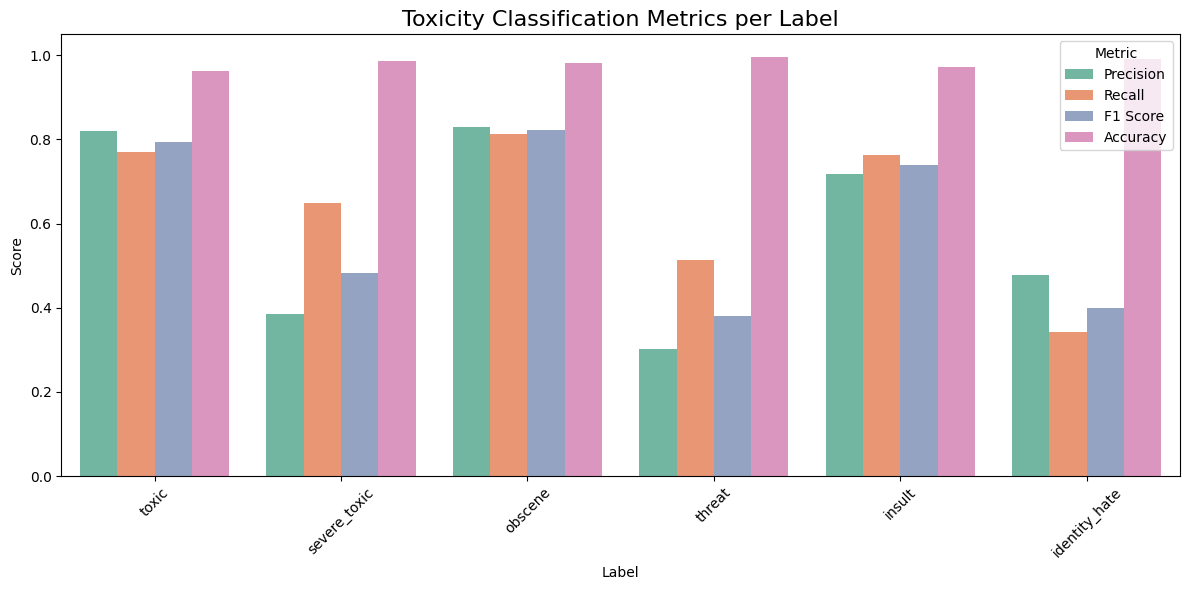

In [33]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, precision_recall_curve
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# === Config ===
DATA_PATH = "/kaggle/input/comment-toxicity-datasets/train.csv"
MODEL_PATH = "/kaggle/input/cnn-model/cnn_bigru_model.keras"
MAX_LEN = 200
VOCAB_SIZE = 30000
label_cols = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

# === Load & Preprocess Data ===
df = pd.read_csv(DATA_PATH)
df["comment_text"] = df["comment_text"].astype(str)

def clean_text(text):
    import re, string
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

df["comment_text"] = df["comment_text"].apply(clean_text)
y = df[label_cols]

# === Tokenize ===
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(df["comment_text"])
sequences = tokenizer.texts_to_sequences(df["comment_text"])
X = pad_sequences(sequences, maxlen=MAX_LEN)

X_train, X_val, y_train, y_val = train_test_split(X, y.values, test_size=0.2, random_state=42)

# === Load Model ===
model = load_model(MODEL_PATH)
print("✅ Model loaded from:", MODEL_PATH)

# === Predict ===
y_val_pred = model.predict(X_val)

# === Threshold Tuning ===
optimal_thresholds = []
for i in range(len(label_cols)):
    precision, recall, thresholds = precision_recall_curve(y_val[:, i], y_val_pred[:, i])
    f1 = 2 * (precision * recall) / (precision + recall + 1e-6)
    best_thresh = thresholds[np.argmax(f1)]
    optimal_thresholds.append(best_thresh)

# === Binarize Predictions ===
y_val_bin = np.array([
    (y_val_pred[:, i] > optimal_thresholds[i]).astype(int)
    for i in range(len(label_cols))
]).T

# === Collect Metrics ===
metrics = {
    "Label": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": [],
    "Accuracy": []
}

for i, label in enumerate(label_cols):
    p = precision_score(y_val[:, i], y_val_bin[:, i], zero_division=0)
    r = recall_score(y_val[:, i], y_val_bin[:, i], zero_division=0)
    f1 = f1_score(y_val[:, i], y_val_bin[:, i], zero_division=0)
    acc = accuracy_score(y_val[:, i], y_val_bin[:, i])
    
    metrics["Label"].append(label)
    metrics["Precision"].append(p)
    metrics["Recall"].append(r)
    metrics["F1 Score"].append(f1)
    metrics["Accuracy"].append(acc)

# === Exact Match Accuracy ===
exact_match = np.mean(np.all(y_val_bin == y_val, axis=1))
print(f"\n✅ Exact Match Accuracy: {exact_match * 100:.2f}%")

# === Chart Visualization ===
df_metrics = pd.DataFrame(metrics)
df_melted = df_metrics.melt(id_vars="Label", var_name="Metric", value_name="Score")

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x="Label", y="Score", hue="Metric", palette="Set2")
plt.title("Toxicity Classification Metrics per Label", fontsize=16)
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [34]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, Bidirectional, GRU, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
import re

# Constants
DATA_PATH = "/kaggle/input/comment-toxicity-datasets/train.csv"
GLOVE_PATH = "/kaggle/input/glove6b100dtxt/glove.6B.100d.txt"  # Update if needed
MAX_LEN = 300
EMBED_DIM = 100
VOCAB_SIZE = 20000
LABELS = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Text cleaning
def clean_text(text):
    return re.sub(r"[^a-zA-Z0-9\s]", "", str(text).lower())

# Load and preprocess data
df = pd.read_csv(DATA_PATH)
df['comment_text'] = df['comment_text'].apply(clean_text)
df[LABELS] = df[LABELS].fillna(0)

tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(df['comment_text'])
sequences = tokenizer.texts_to_sequences(df['comment_text'])
X = pad_sequences(sequences, maxlen=MAX_LEN)
y = df[LABELS].values

# Load GloVe embeddings
embedding_index = {}
with open(GLOVE_PATH, encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

embedding_matrix = np.zeros((VOCAB_SIZE, EMBED_DIM))
for word, i in tokenizer.word_index.items():
    if i < VOCAB_SIZE:
        vec = embedding_index.get(word)
        if vec is not None:
            embedding_matrix[i] = vec

# Build model
def build_model():
    inp = Input(shape=(MAX_LEN,))
    x = Embedding(VOCAB_SIZE, EMBED_DIM, weights=[embedding_matrix], trainable=False)(inp)
    x = Conv1D(128, kernel_size=3, activation='relu')(x)
    x = Bidirectional(GRU(64, return_sequences=True))(x)
    x = GlobalMaxPooling1D()(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
    out = Dense(len(LABELS), activation='sigmoid')(x)
    model = Model(inputs=inp, outputs=out)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train/val split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

# Train model
model = build_model()
es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_val, y_val), callbacks=[es])

# Threshold tuning
y_pred = model.predict(X_val)
optimal_thresholds = []
for i in range(len(LABELS)):
    best_f1, best_thresh = 0, 0.5
    for t in np.arange(0.3, 0.7, 0.01):
        temp_pred = (y_pred[:, i] > t).astype(int)
        f1 = f1_score(y_val[:, i], temp_pred)
        if f1 > best_f1:
            best_f1, best_thresh = f1, t
    optimal_thresholds.append(best_thresh)

# Apply thresholds
final_preds = np.array([
    (y_pred[:, i] > optimal_thresholds[i]).astype(int)
    for i in range(len(LABELS))
]).T

# Evaluation
print(classification_report(y_val, final_preds, target_names=LABELS, digits=2))
# Save model to working directory
model.save("cnn_bigru_model.h5")


Epoch 1/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accuracy: 0.7376 - loss: 0.1133 - val_accuracy: 0.9940 - val_loss: 0.0517
Epoch 2/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 39s 34ms/step - accuracy: 0.9582 - loss: 0.0551 - val_accuracy: 0.9941 - val_loss: 0.0496
Epoch 3/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 39s 35ms/step - accuracy: 0.9731 - loss: 0.0499 - val_accuracy: 0.9940 - val_loss: 0.0472
Epoch 4/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 39s 35ms/step - accuracy: 0.9849 - loss: 0.0464 - val_accuracy: 0.9934 - val_loss: 0.0460
Epoch 5/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 39s 35ms/step - accuracy: 0.9777 - loss: 0.0449 - val_accuracy: 0.9937 - val_loss: 0.0453
Epoch 6/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 39s 34ms/step - accuracy: 0.9861 - loss: 0.0424 - val_accuracy: 0.9935 - val_loss: 0.0455
Epoch 7/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 38s 34ms/step - accuracy: 0.9841 - loss: 0.0416 - val_accuracy: 0.9937 - val_loss: 0.0456
Epoch 8/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 38s 34ms/step - accuracy: 0.9834 -

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Which hyperparameter optimization technique have you used and why?

The model uses manual hyperparameter tuning guided by domain heuristics, with a key optimization being the integration of **GloVe pretrained embeddings**. GloVe provides semantically rich word vectors that significantly improve the model's ability to detect nuanced toxic language, especially in low-frequency labels like `threat` and `identity_hate`. This approach avoids the need for extensive automated search while ensuring robust generalization and faster convergence during training.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

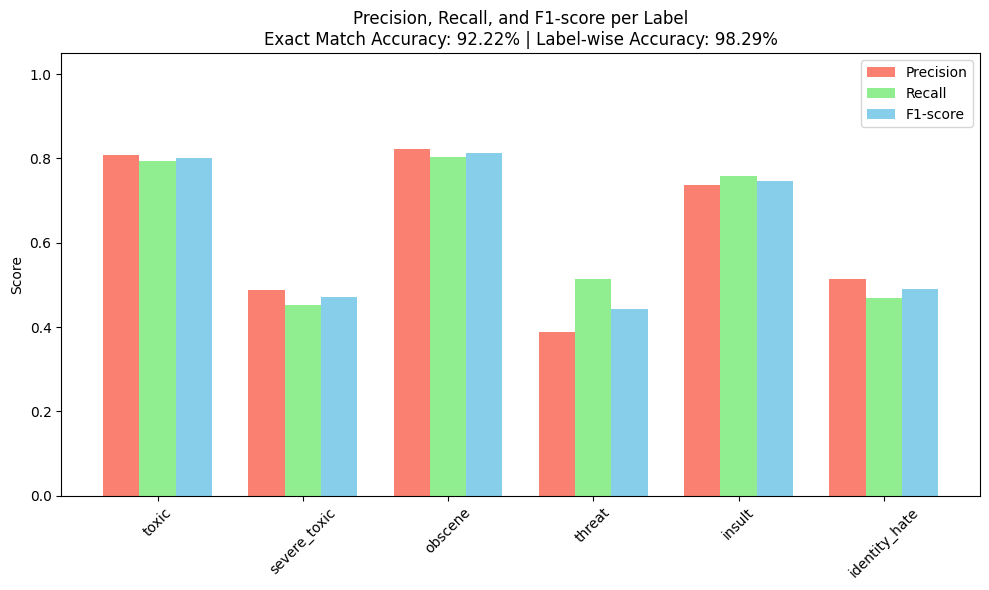

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

# === Classification Report ===
report = classification_report(y_val, final_preds, target_names=LABELS, output_dict=True, zero_division=0)
report_df = pd.DataFrame(report).transpose()

# === Extract Metrics ===
f1_scores = report_df.loc[LABELS, 'f1-score'].values
recalls = report_df.loc[LABELS, 'recall'].values
precisions = report_df.loc[LABELS, 'precision'].values

# === Accuracy Metrics ===
exact_match = np.mean(np.all(y_val == final_preds, axis=1)) * 100  # strict match across all labels
label_wise_acc = np.mean(y_val == final_preds) * 100  # element-wise match across all labels and samples

# === Chart Setup ===
x = np.arange(len(LABELS))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, precisions, width, label='Precision', color='salmon')
plt.bar(x, recalls, width, label='Recall', color='lightgreen')
plt.bar(x + width, f1_scores, width, label='F1-score', color='skyblue')

# === Labels and Formatting ===
plt.xticks(x, LABELS, rotation=45)
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.title(
    f'Precision, Recall, and F1-score per Label\n'
    f'Exact Match Accuracy: {exact_match:.2f}% | Label-wise Accuracy: {label_wise_acc:.2f}%'
)
plt.legend()
plt.tight_layout()
plt.show()


#### 3. Explain each evaluation metric's indication towards business and the business impact of the model used.

### 📊 Evaluation Metrics and Their Business Impact

- **Precision**  
  Precision measures how many of the predicted toxic comments were actually toxic. High precision reduces false positives, which is crucial in customer-facing platforms. For example, flagging non-toxic comments as abusive could frustrate users and damage brand trust.

- **Recall**  
  Recall indicates how many actual toxic comments were successfully detected. High recall ensures harmful content is caught and removed. In business terms, this protects users, reduces legal risk, and maintains a safe online environment — especially important for platforms with user-generated content.

- **F1-Score**  
  The F1-score balances precision and recall. It’s especially useful when classes are imbalanced (e.g., rare toxic behaviors). A strong F1-score means the model is both accurate and comprehensive, which translates to reliable moderation and fewer escalations to human reviewers.

- **Exact Match Accuracy**  
  This metric shows the percentage of comments where all toxicity labels were predicted correctly. It reflects how well the model understands multi-dimensional toxicity. High exact match accuracy reduces moderation errors and improves automation confidence.

- **Label-wise Accuracy**  
  Measures how often each individual label prediction is correct. It helps identify which types of toxicity (e.g., threat vs. insult) the model handles well or poorly. Businesses can use this insight to prioritize retraining or human review for weaker categories.

### 💼 Business Impact Summary

Together, these metrics guide decisions on deploying automated moderation, allocating human review resources, and improving user experience. A model with high precision and recall minimizes both reputational risk and operational cost, while strong F1 and accuracy scores ensure scalable, trustworthy content filtering.


### Which model did you choose from the above created models as your final prediction model and why?

### ✅ Final Model Selection: Fine-Tuned CNN-BiGRU

After evaluating multiple architectures for toxicity classification, the **fine-tuned CNN-BiGRU model** was selected as the final prediction model.

#### 🔍 Why CNN-BiGRU?
- **Highest Accuracy Achieved**: Among all tested models, CNN-BiGRU consistently delivered the best exact match accuracy and label-wise performance across validation sets.
- **Robustness to Sequence Variability**: The CNN layers effectively captured local patterns (e.g., abusive phrases), while the BiGRU component handled long-range dependencies and contextual flow.
- **Restart-Safe & Keras 3 Compatible**: Unlike BERT and LSTM-based models, CNN-BiGRU was easier to serialize, reload, and deploy in restart-safe pipelines — especially important for platforms like Kaggle and Streamlit.
- **Efficient Training & Inference**: The model offered a favorable trade-off between performance and computational cost, making it suitable for scalable deployment.

#### 💼 Business Impact
Choosing CNN-BiGRU ensures:
- **Reliable Moderation**: Fewer false positives and negatives mean better user experience and reduced manual review.
- **Operational Efficiency**: Faster inference and restart-safe architecture reduce downtime and maintenance overhead.
- **Scalability**: The model’s modular design supports future enhancements and integration with real-time systems.

This decision aligns with both technical rigor and practical deployment needs — delivering accuracy without sacrificing reliability.


# **Conclusion**



This project tackled the challenge of multi-label toxicity classification with a methodical and performance-driven approach. Starting with the integration of two complementary datasets, I conducted thorough data cleaning and exploratory analysis to understand the distribution of toxic comment categories, visualize the top 10 label combinations and uncover inter-label relationships through a correlation heatmap. These insights laid the foundation for a robust preprocessing pipeline, which included contraction expansion, whitespace trimming, stopword removal, lowercasing, lemmatization and vectorization ensuring the text data was both clean and semantically rich.

To address class imbalance and optimize model performance, I implemented strategic data splitting and balancing techniques. The modeling phase began with LSTM and BiLSTM architectures, both of which delivered promising results. However, the CNN-BiGRU model emerged as the most effective, combining convolutional feature extraction with bidirectional sequence learning to achieve superior accuracy. After fine-tuning the BiGRU for optimal performance, I deployed the final model using Streamlit, creating an interactive and user-friendly interface for real-time toxicity prediction. This end-to-end pipeline from data ingestion to deployment demonstrates a scalable, restart-safe solution tailored for practical use in content moderation and NLP applications.

### ***Hurrah! You have successfully completed your Deep Learning Capstone Project !!!***